Importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
#loading the boston houseprice dataset into pandas framwork
house_price_dataset = pd.read_csv('BostonHousing.csv')

In [7]:
print(house_price_dataset)

        crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  price
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...    ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88   11.9

[506 rows x 14 columns]


In [8]:
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
house_price_dataset.shape

(506, 14)

In [11]:
#finding no of null values
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [12]:
#statistcal measures
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understandimg the corelation between various features in dataset

1. positive co-relation
2. negative co-relation

In [13]:
correlation = house_price_dataset.corr()

<Axes: >

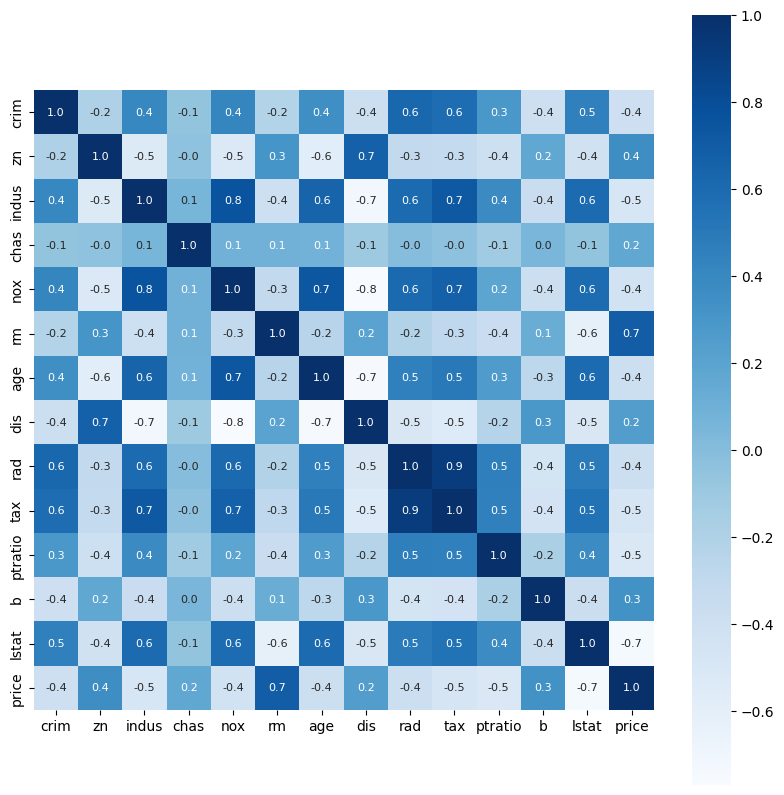

In [16]:
#constructing heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot= True, annot_kws={'size':8}, cmap ='Blues')

spliting the data and target

In [17]:
x= house_price_dataset.drop(columns='price', axis=1)
y= house_price_dataset['price']

In [18]:
print(x)

        crim    zn  indus  chas    nox  ...  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]


In [19]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [21]:
print(x.shape, x_test.shape, x_train.shape)

(506, 13) (102, 13) (404, 13)


Model Traininh

XGBoost Regresson--- descision tree model

In [23]:
model = XGBRegressor()

In [24]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Analysis 

In [25]:
house_price_prediction = model.predict(x_train)
print(house_price_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [26]:
# R Squre error
score_1 = metrics.r2_score(house_price_prediction, y_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(house_price_prediction, y_train)

print('R squred error :', score_1)
print('Mean Absolute Error', score_2 )

R squred error : 0.9999980033283392
Mean Absolute Error 0.0091330346494618


In [27]:
house_price_prediction_test = model.predict(x_test)

In [29]:
# R Squre error
score_1 = metrics.r2_score(house_price_prediction_test, y_test)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(house_price_prediction_test, y_test)

print('R squred error :', score_1)
print('Mean Absolute Error', score_2 )

R squred error : 0.8981202952337628
Mean Absolute Error 2.0748727686264927


Visualizing the Predicted value and Acrual Value

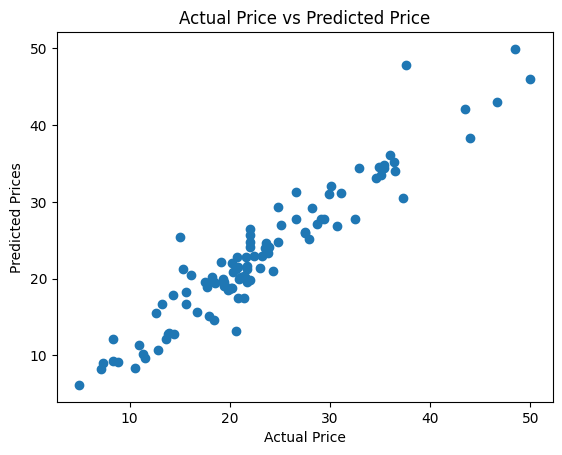

In [31]:
plt.scatter(y_test, house_price_prediction_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Making a predictive model

In [33]:
input_data = (0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48)
input_data_asarray = np.asarray(input_data)

input_data_reshape = input_data_asarray.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

[24.746912]
